In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler

#Normalizar datos
from sklearn.preprocessing import MinMaxScaler

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb


#Métricas
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Importación knn
from sklearn.neighbors import KNeighborsClassifier

# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


Cargar y leer información del dataset

In [2]:
dataframe=pd.read_csv("/content/bank-full.csv", sep=";")

Revisar si el dataframe contiene nulos

In [3]:
dataframe.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Información del dataframe

In [4]:
dataframe.info() # información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Visualizar algunas filas del dataframe

In [5]:
dataframe.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Obtener datos básicos estadistícos

In [6]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Verificar distribuciones de probabilidad de las columnas numéricas

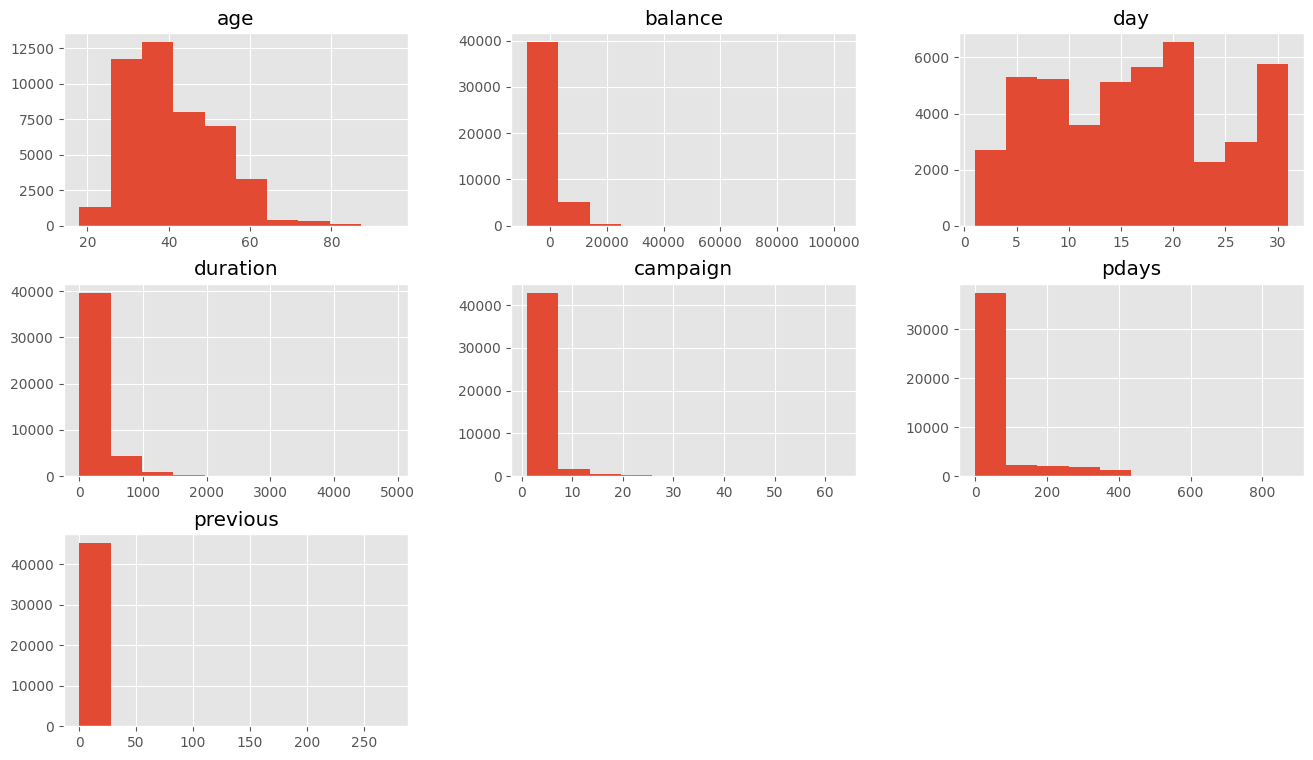

In [7]:
numerico = dataframe.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
numerico.hist()
plt.show()

Se usará la prueba de Agostino para comprobar

In [8]:
normal=[]
noNormal=[]
for i in numerico:
  datosColumna = numerico[i]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(i)
  else:
    noNormal.append(i)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Correlación de columnas numéricas

<Axes: title={'center': 'Bank'}>

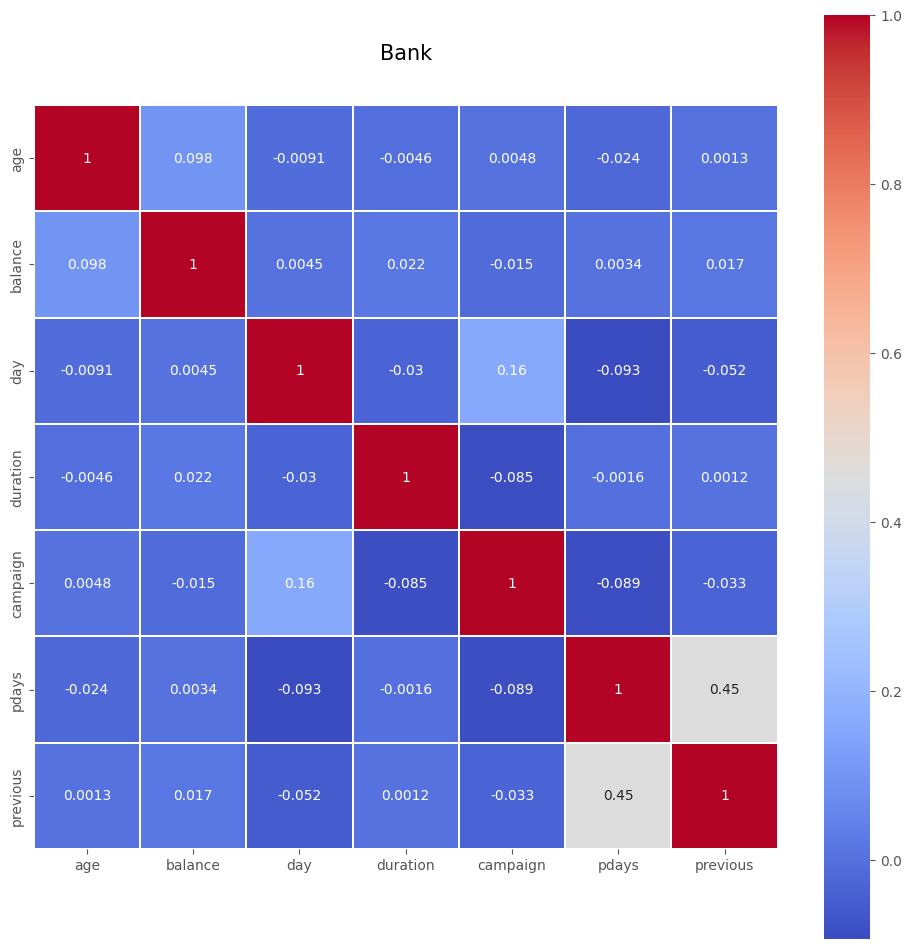

In [9]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Bank', y=1.05, size=15)
sb.heatmap(numerico.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Histogramas de datos categoricos

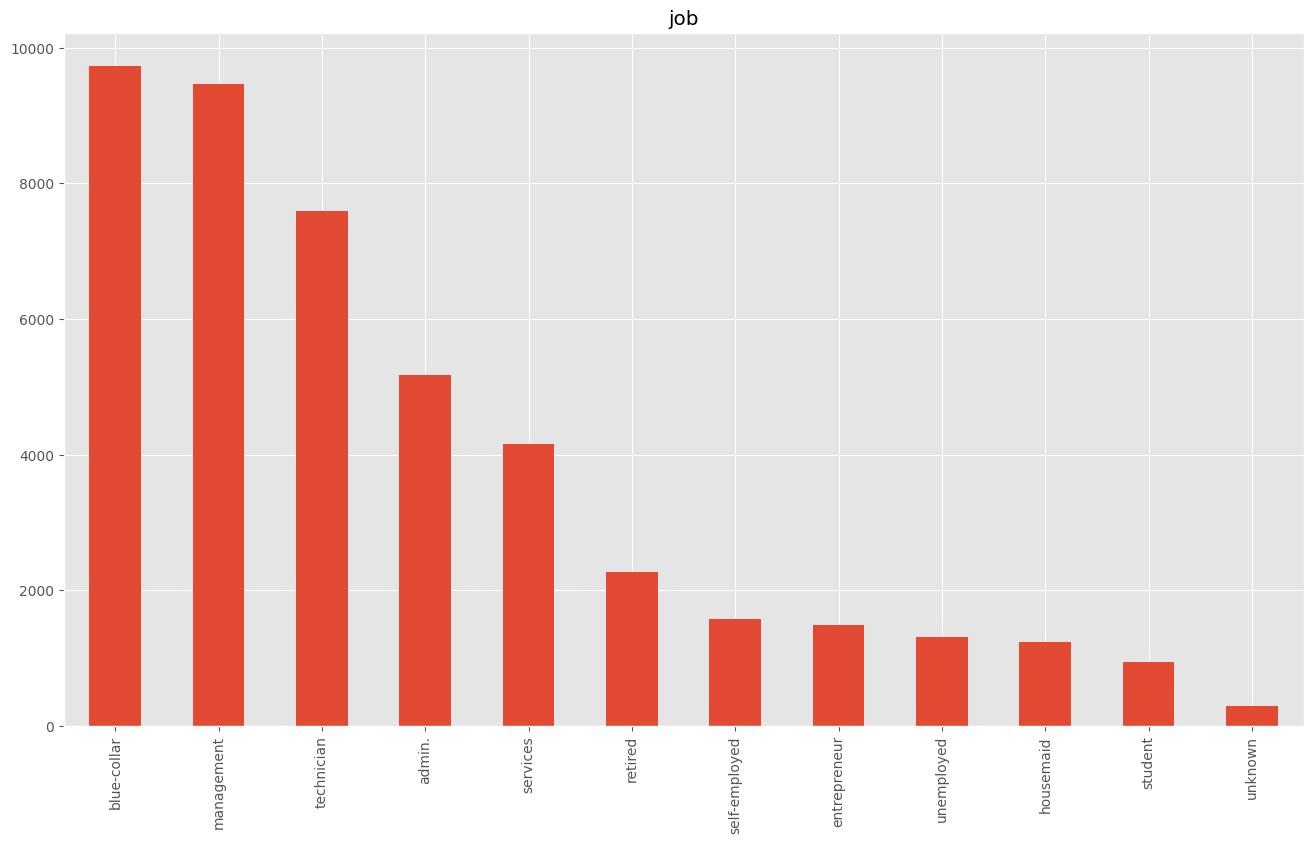

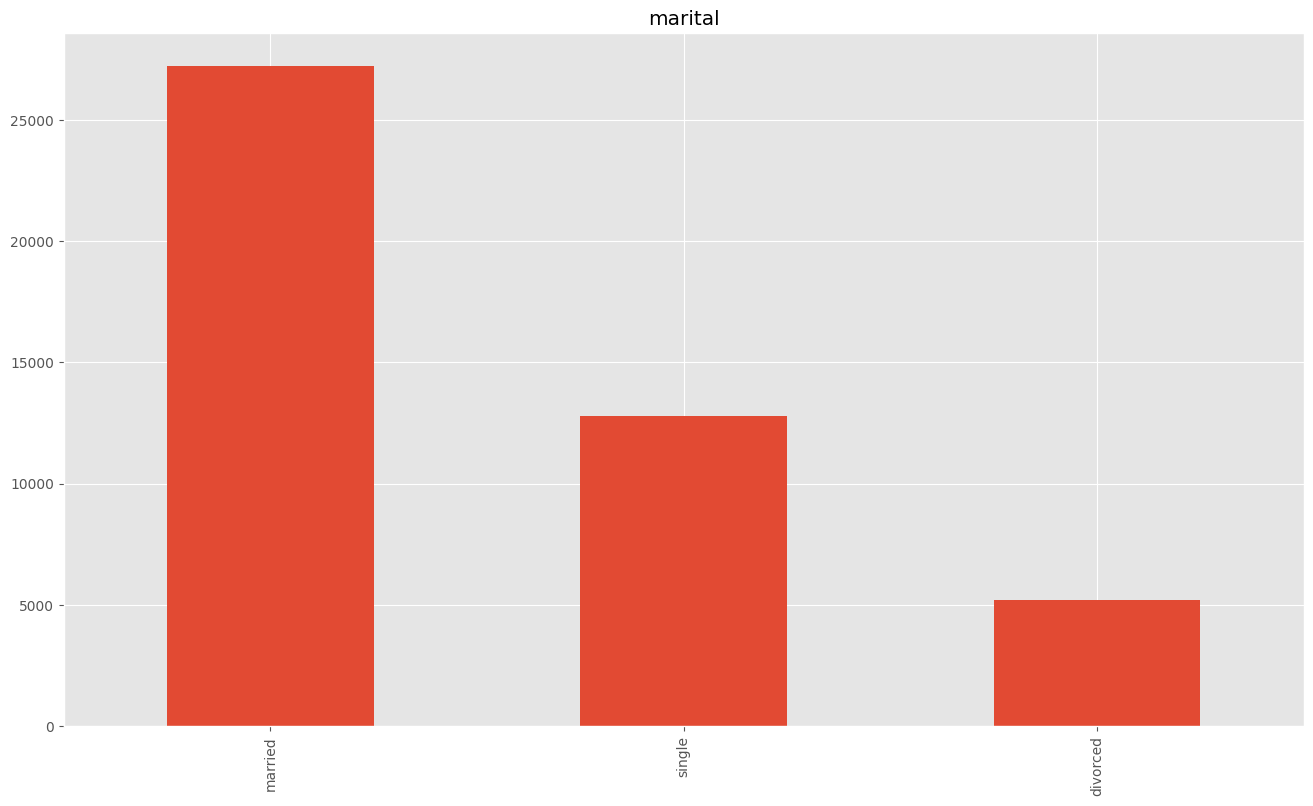

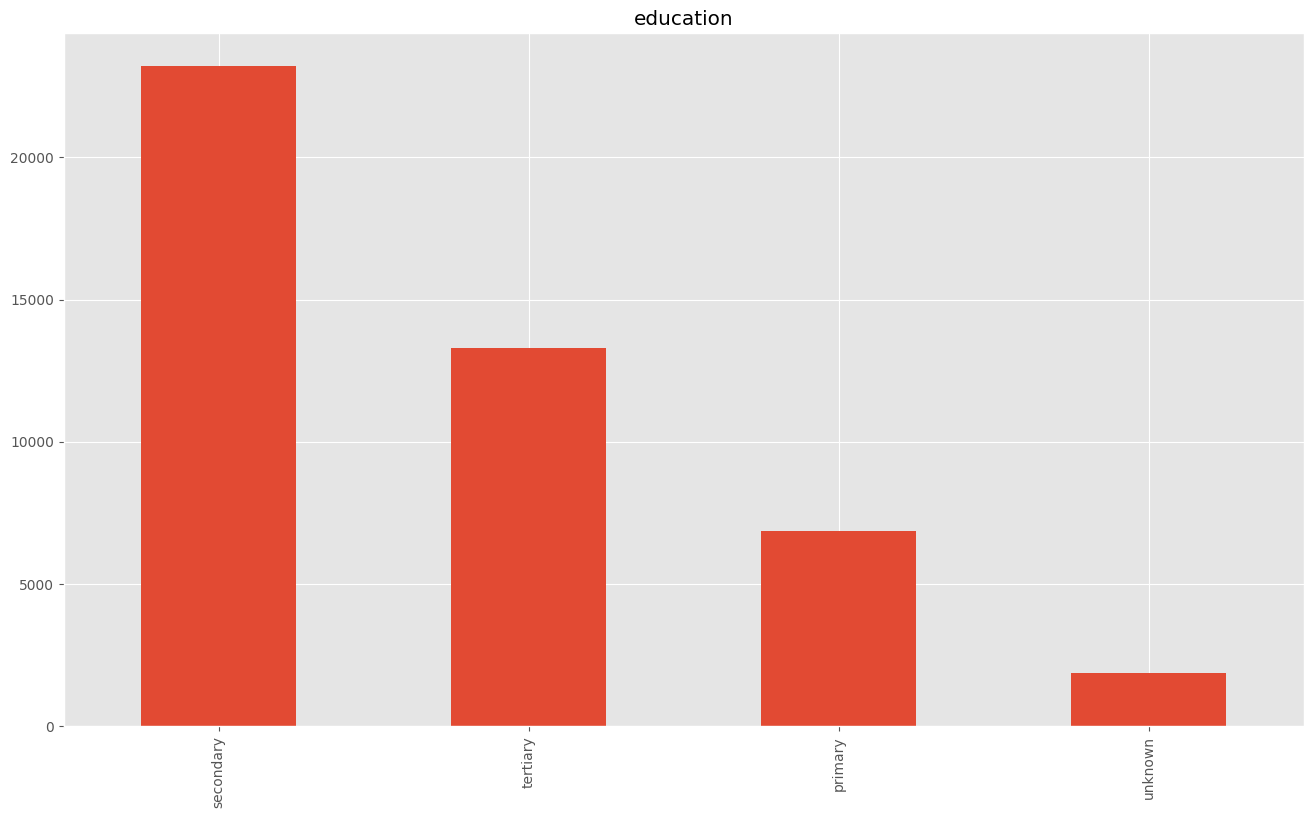

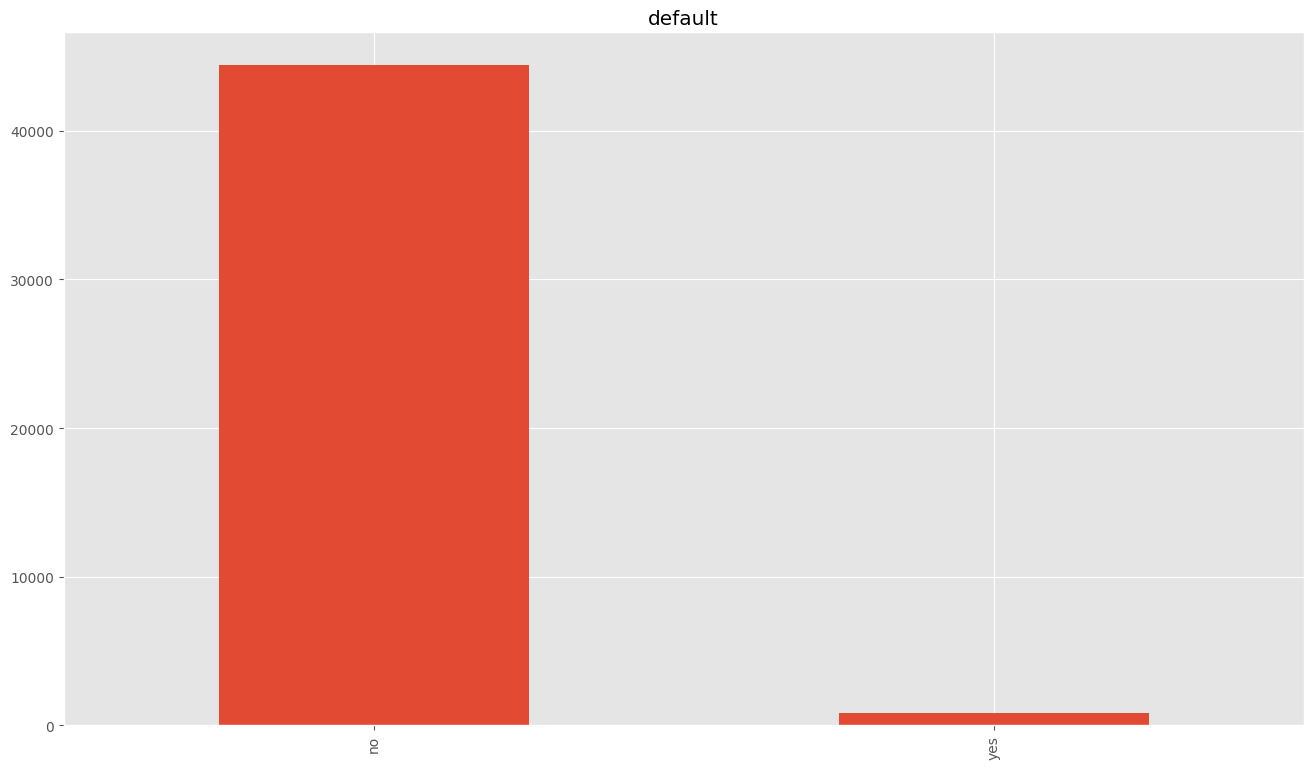

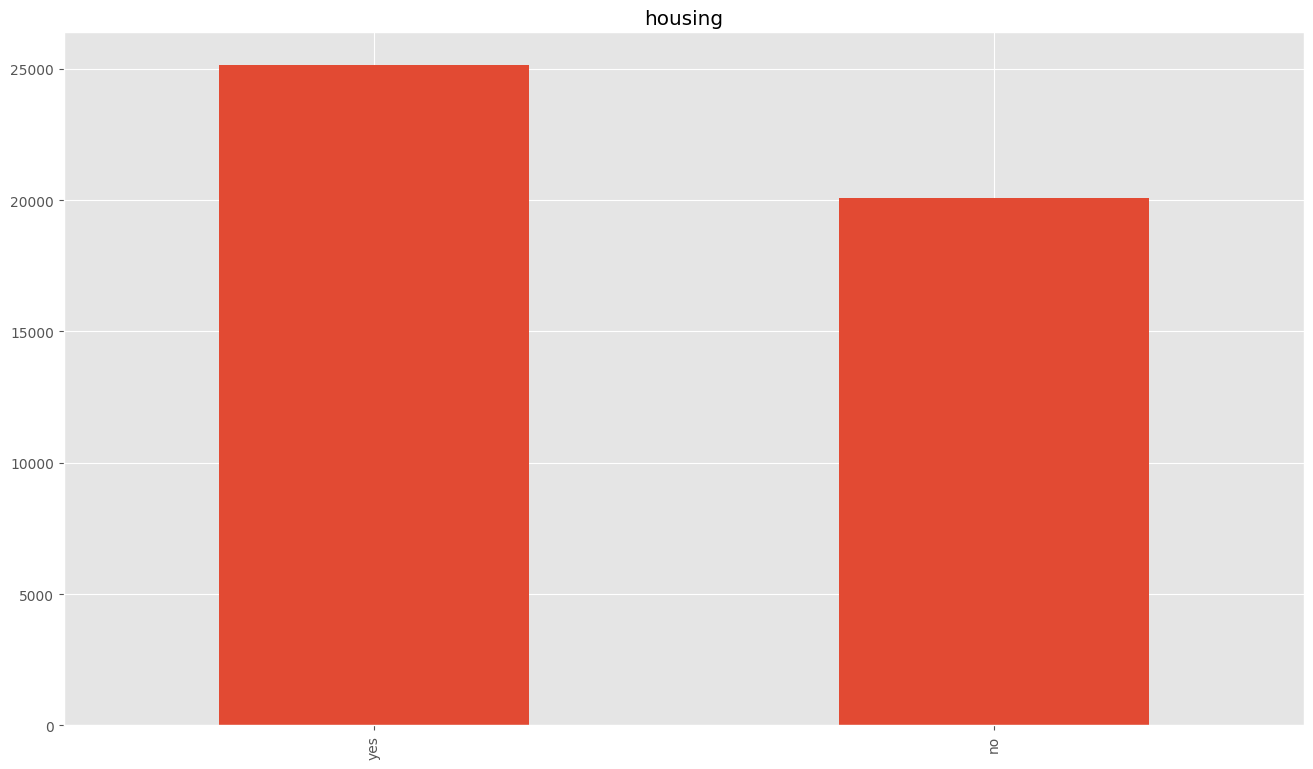

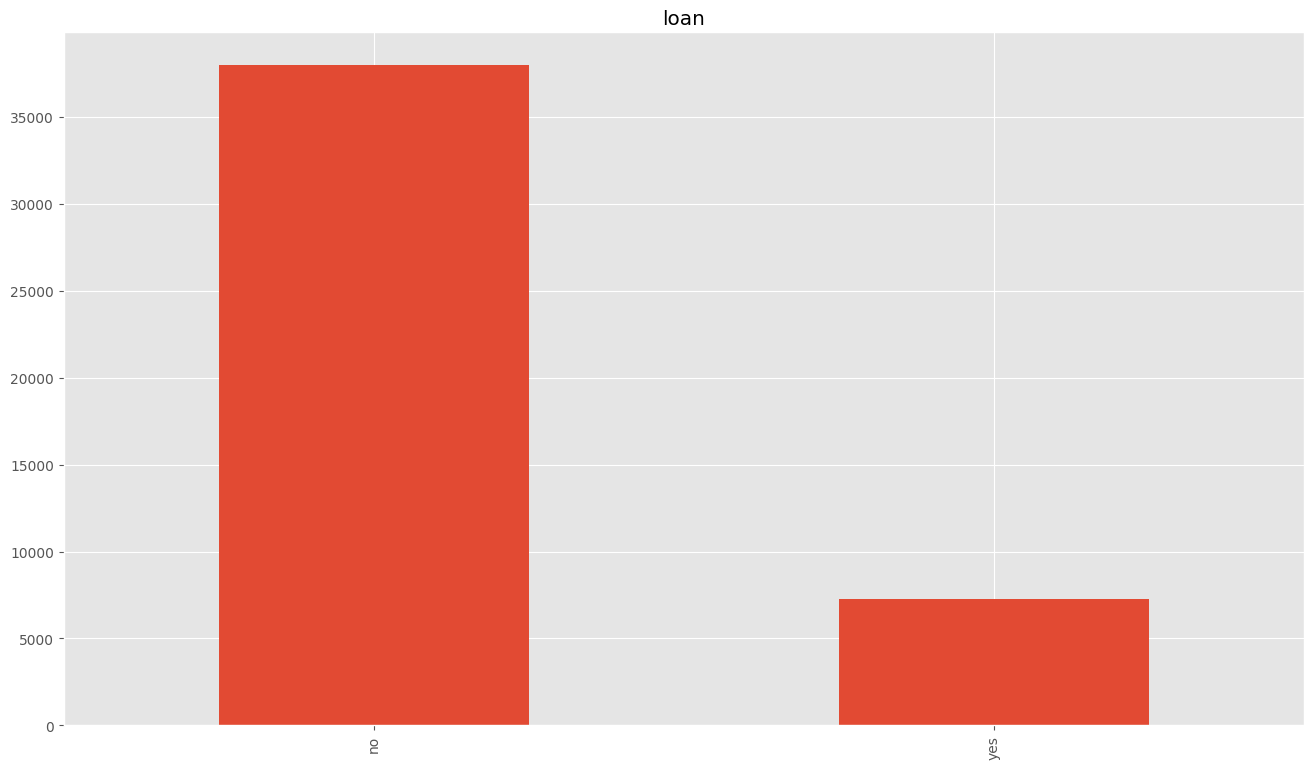

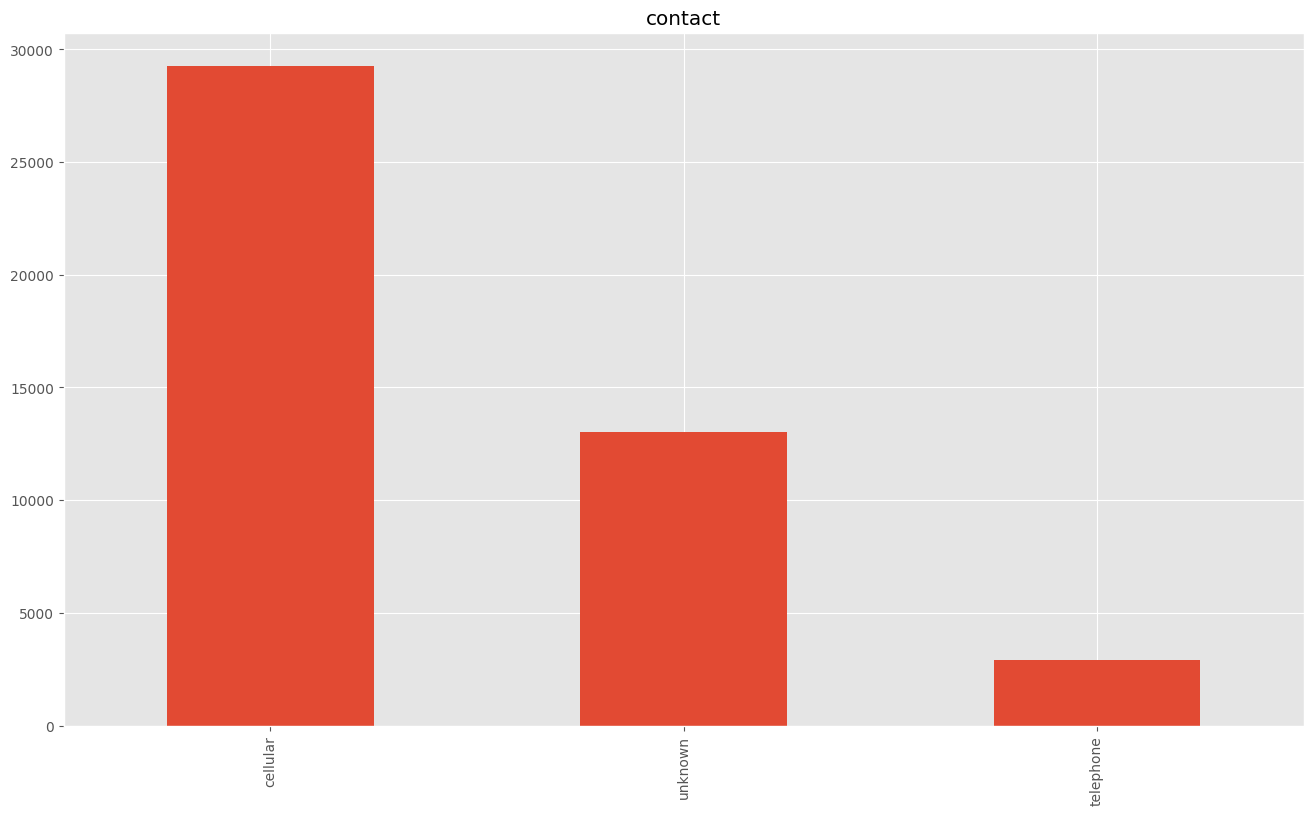

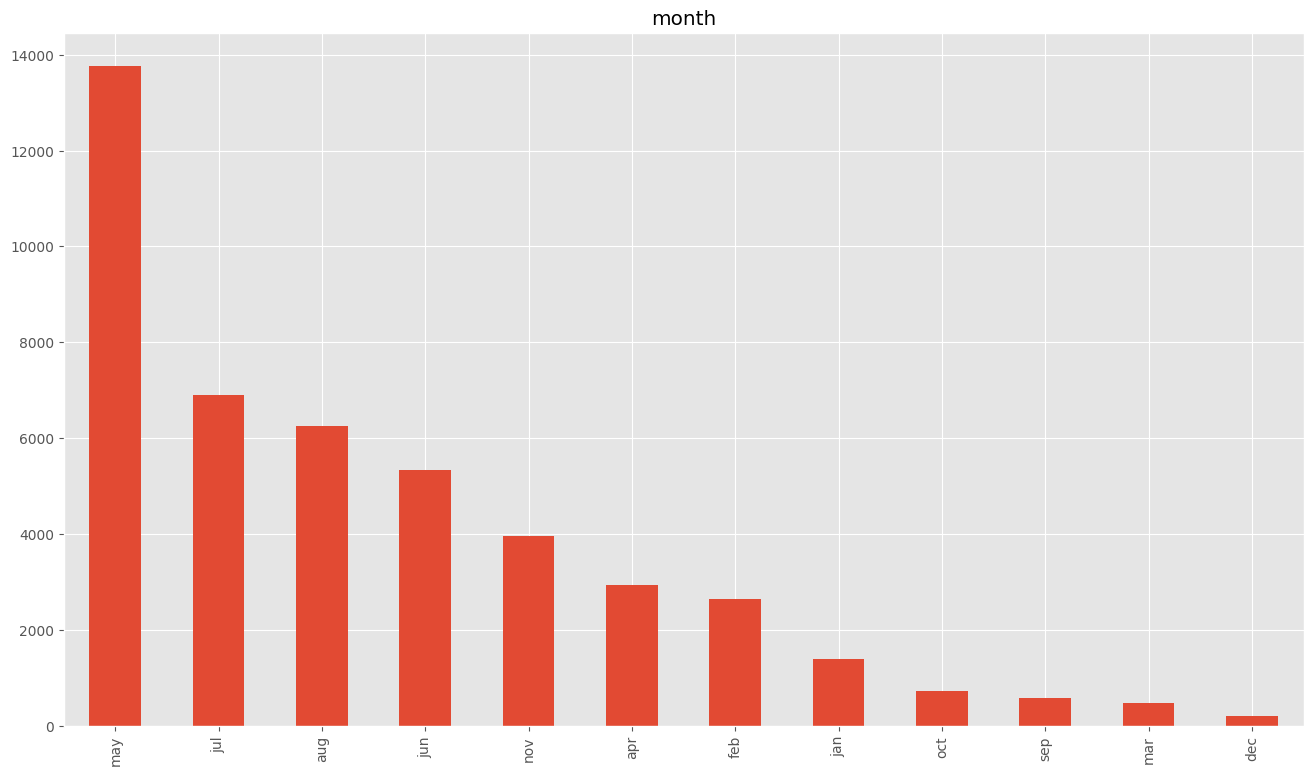

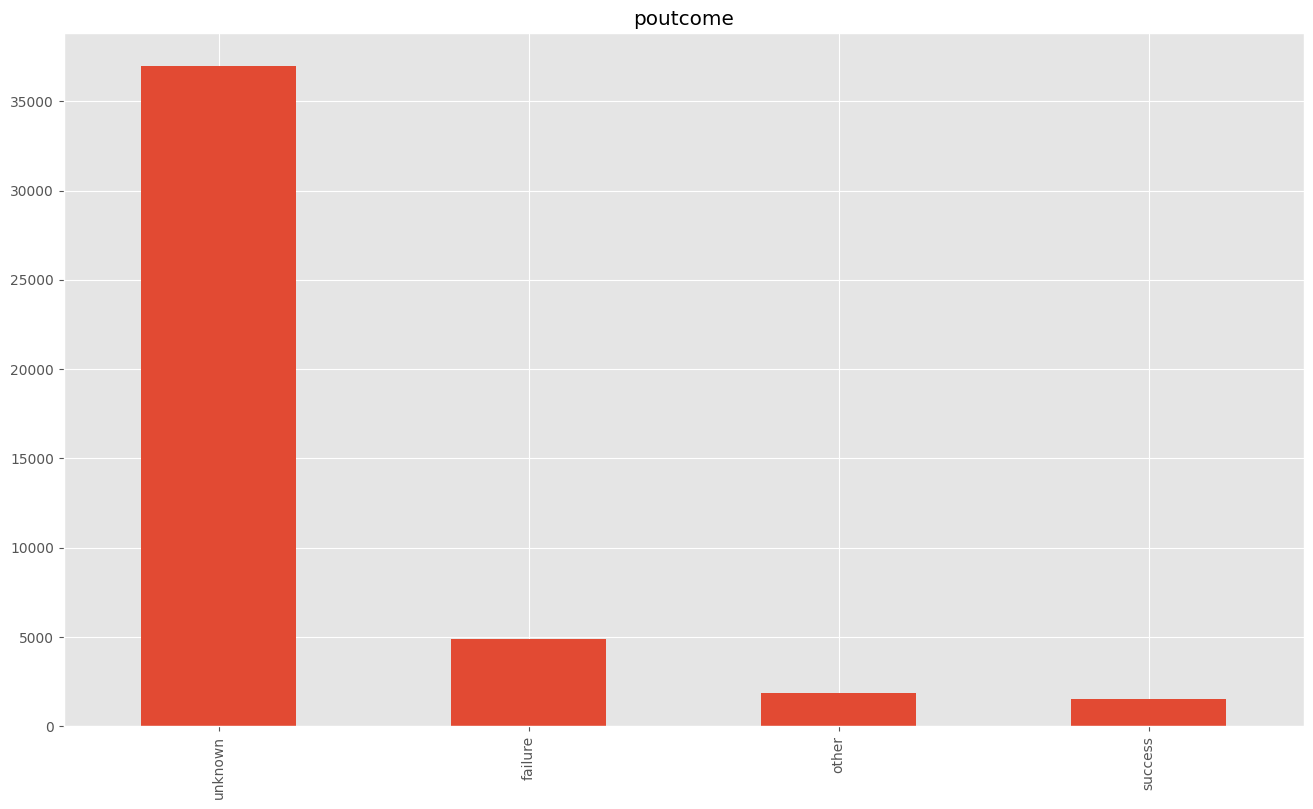

In [10]:
categoricos = [col for col in dataframe.columns if dataframe[col].dtype == 'object' and col!= 'y'] # obteniendo los datos categoricos

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
      fig, ax = plt.subplots()
      dataframe[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()

Codificar los valores categoricos para que queden en números

In [11]:
encoder=LabelEncoder()
cat_colsAll = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
# Obtener columnas a encodificar
for col in cat_colsAll:
        dataframe[col] = encoder.fit_transform(dataframe[col])

Separar información por tipo de dato categórico y numérico

In [12]:
dataNumerica = dataframe.select_dtypes(np.number)
dataCategorica = dataframe.select_dtypes(object)


Normalizar

In [13]:
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)

In [14]:
dataNumerica3 = dataNumerica2.round()
dataNumerica3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2.0,-0.0,-0.0,1.0,-0.0,0.0,1.0,-0.0,2.0,-1.0,1.0,0.0,-1.0,-0.0,-0.0,0.0,-0.0
1,0.0,1.0,1.0,-0.0,-0.0,-0.0,1.0,-0.0,2.0,-1.0,1.0,-0.0,-1.0,-0.0,-0.0,0.0,-0.0
2,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,1.0,2.0,2.0,-1.0,1.0,-1.0,-1.0,-0.0,-0.0,0.0,-0.0
3,1.0,-1.0,-0.0,2.0,-0.0,0.0,1.0,-0.0,2.0,-1.0,1.0,-1.0,-1.0,-0.0,-0.0,0.0,-0.0
4,-1.0,2.0,1.0,2.0,-0.0,-0.0,-1.0,-0.0,2.0,-1.0,1.0,-0.0,-1.0,-0.0,-0.0,0.0,-0.0


In [15]:
dataNumerica4 = dataNumerica3.astype(int)
dataframe = pd.concat([dataNumerica4,dataCategorica], axis = 1)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,0,0,1,0,0,1,0,2,-1,1,0,-1,0,0,0,0
1,0,1,1,0,0,0,1,0,2,-1,1,0,-1,0,0,0,0
2,-1,-1,0,0,0,0,1,2,2,-1,1,-1,-1,0,0,0,0
3,1,-1,0,2,0,0,1,0,2,-1,1,-1,-1,0,0,0,0
4,-1,2,1,2,0,0,-1,0,2,-1,1,0,-1,0,0,0,0


Visualizar los datos después de la normalización y modificiación de información

In [16]:
dataframe.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,0,0,1,0,0,1,0,2,-1,1,0,-1,0,0,0,0
1,0,1,1,0,0,0,1,0,2,-1,1,0,-1,0,0,0,0
2,-1,-1,0,0,0,0,1,2,2,-1,1,-1,-1,0,0,0,0
3,1,-1,0,2,0,0,1,0,2,-1,1,-1,-1,0,0,0,0
4,-1,2,1,2,0,0,-1,0,2,-1,1,0,-1,0,0,0,0
5,-1,0,0,1,0,0,1,0,2,-1,1,0,-1,0,0,0,0
6,-1,0,1,1,0,0,1,2,2,-1,1,0,-1,0,0,0,0
7,0,-1,-2,1,7,0,1,0,2,-1,1,0,-1,0,0,0,0
8,2,0,0,-2,0,0,1,0,2,-1,1,-1,-1,0,0,0,0
9,0,1,1,0,0,0,1,0,2,-1,1,-1,-1,0,0,0,0


Asignación de variables para X y Y

In [17]:
X=dataframe.drop(["y"],axis=1) # obtener valores de x
y=dataframe["y"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(45211, 16)
       age  job  marital  education  default  balance  housing  loan  contact  \
0        2    0        0          1        0        0        1     0        2   
1        0    1        1          0        0        0        1     0        2   
2       -1   -1        0          0        0        0        1     2        2   
3        1   -1        0          2        0        0        1     0        2   
4       -1    2        1          2        0        0       -1     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206    1    1        0          1        0        0       -1     0       -1   
45207    3    0       -2         -2        0        0       -1     0       -1   
45208    3    0        0          0        0        1       -1     0       -1   
45209    2   -1        0          0        0        0       -1     0        0   
45210    0   -1        0          0        0        1       -1     0       -1   

       day  mon

Selección de caracteristicas

In [18]:
caracteristicas=list(dataframe)
print(caracteristicas)

XArbol=dataframe.drop(["marital","contact","day","month", "duration", "y"],axis=1)
yArbol=dataframe["y"]
caracteristicas=list(XArbol)
print(caracteristicas)
print(XArbol)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome']
       age  job  education  default  balance  housing  loan  campaign  pdays  \
0        2    0          1        0        0        1     0        -1      0   
1        0    1          0        0        0        1     0        -1      0   
2       -1   -1          0        0        0        1     2        -1      0   
3        1   -1          2        0        0        1     0        -1      0   
4       -1    2          2        0        0       -1     0        -1      0   
...    ...  ...        ...      ...      ...      ...   ...       ...    ...   
45206    1    1          1        0        0       -1     0         0      0   
45207    3    0         -2        0        0       -1     0         0      0 

PARTICIÓN DE DATOS  80% 20%

In [19]:
XTrainArbol,XTestArbol,yTrainArbol,yTestArbol=train_test_split(XArbol,yArbol,test_size=0.2,random_state=2)

Buscar entra un rango de profundidas cual es el mejor para el modelo

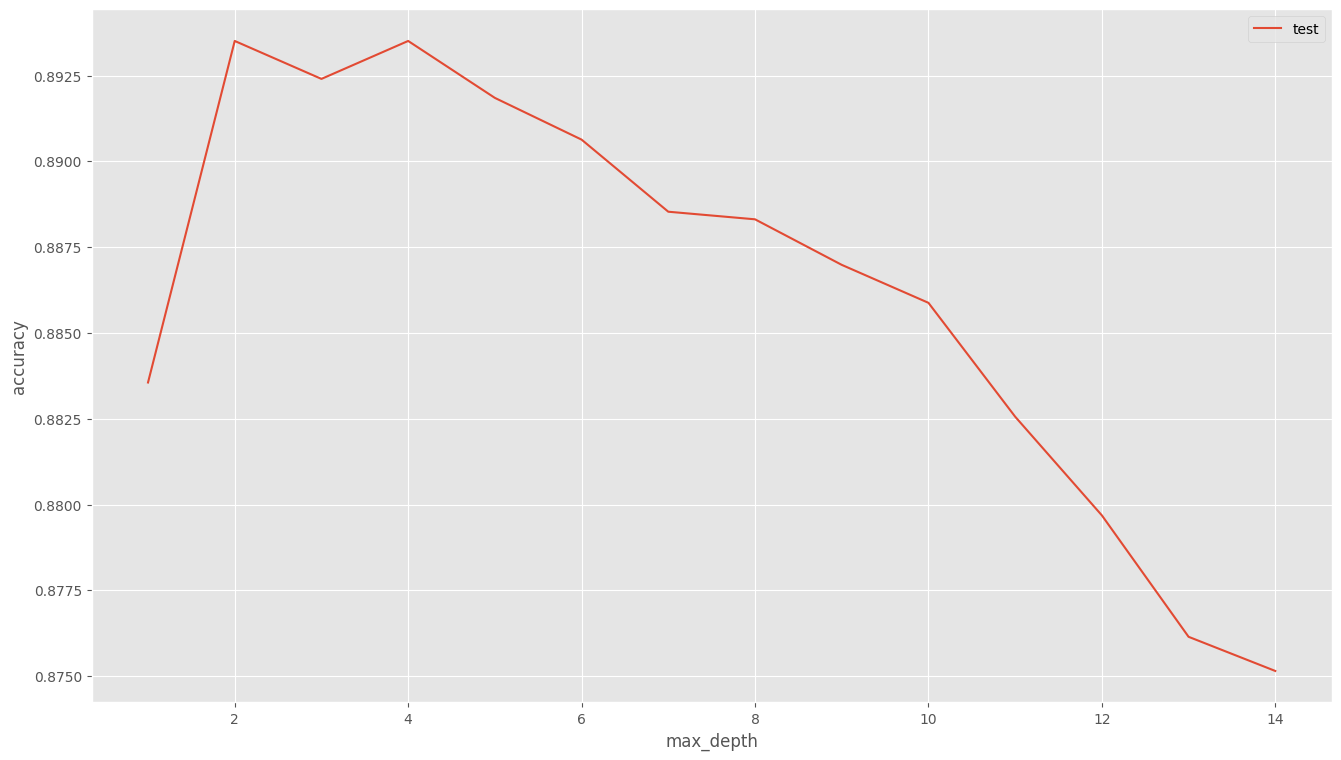

Optimal depth: 2
Accuracy: 0.8935085511478986


In [20]:
# lista de valores posibles para usar como max_depths
max_depths = list(range(1, 15))

# inicializar las listas para almacenar los resultados
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)

    # calcular la precisión del modelo utilizando la validación cruzada de 5-fold
    test_score = cross_val_score(dt, XTestArbol, yTestArbol, cv=5).mean()

    test_scores.append(test_score)

# graficar los resultados para visualizar la curva de complejidad
plt.plot(max_depths, test_scores, label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# imprimir la profundidad óptima y la precisión asociada
best_depth = max_depths[test_scores.index(max(test_scores))]
best_score = max(test_scores)
print('Optimal depth:', best_depth)
print('Accuracy:', best_score)

Implementación modelo

In [21]:
modeloArbol=DecisionTreeClassifier(max_depth=2) # DecisionTreeClassifier(max_depth=3) establece la profundidad del árbol en 3
modeloArbol.fit(XTrainArbol,yTrainArbol)
yPredictArbol=modeloArbol.predict(XTrainArbol)
print("Train Accuracy ",metrics.accuracy_score(yTrainArbol,yPredictArbol))

yPredictArbol=modeloArbol.predict(XTestArbol)
print("Test Accuracy ",metrics.accuracy_score(yTestArbol,yPredictArbol))

Train Accuracy  0.892695200176952
Test Accuracy  0.8935087913303107


Identificar overfitting o underfitting usando Vaidación Cruzada

In [22]:
scores = cross_val_score(modeloArbol, X, y, cv=5)

meanScore = np.mean(scores) #Calcular la media de las puntuaciones de precisión
stdScore = np.std(scores) # Calcular la dsviación estandar de las puntuaciones de precision

yPredicTrain = modeloArbol.predict(XTrainArbol) # predicciones en los datos de entrenamiento
yPredTest = modeloArbol.predict(XTestArbol) # predicciones en los datos de prueba

accuracyTrain = accuracy_score(yTrainArbol, yPredicTrain) # precisión en los datos de entrenamiento
accuracy_test = accuracy_score(yTestArbol, yPredTest) # precisión en los datos de prueba

print(f'Precisión en los datos de entrenamiento: {accuracyTrain}')
print(f'Precisión en los datos de prueba: {accuracy_test}')

# puntuaciones de precisión y sus estadísticas
print(f'Puntuaciones de precisión: {scores.mean()}')
print(f'Precisión media: {meanScore}')
print(f'Desviación estándar de la precisión: {stdScore}')

Precisión en los datos de entrenamiento: 0.892695200176952
Precisión en los datos de prueba: 0.8935087913303107
Puntuaciones de precisión: 0.8718229815654045
Precisión media: 0.8718229815654045
Desviación estándar de la precisión: 0.01219393462632244


Matriz de confusión

[[7875  115]
 [ 848  205]]


<Axes: >

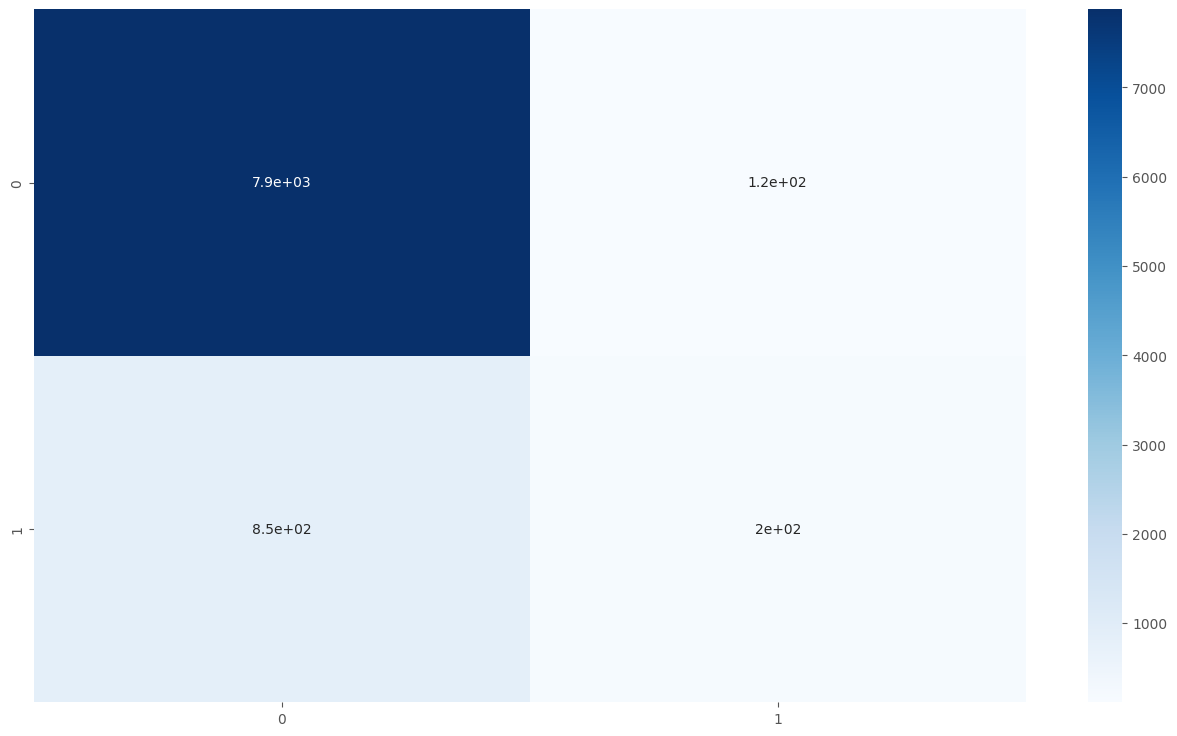

In [23]:
matrizArbol =confusion_matrix(yTestArbol,yPredictArbol)
print(matrizArbol)
sb.heatmap(matrizArbol,annot=True,cmap="Blues")

Significado valores matriz de confusión

In [24]:
vp = matrizArbol[0,0]
fp = matrizArbol[0,1]
fn = matrizArbol[1,0]
vn = matrizArbol[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print("Verdaderos Positivos = ", vp)
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print("Falsos Positivos = ", fp)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print("Falsos Negativos = ", fn)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print("Verdaderos Negativos = ", vn)

Verdaderos Positivos =  7875
Falsos Positivos =  115
Falsos Negativos =  848
Verdaderos Negativos =  205


Evaluación capacidad de clasificación correcta del modelo

In [25]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)

Sensibilidad: 0.9027857388513126
Especificidad: 0.640625


Métricas

In [26]:
precision_recall_fscore_support(yTestArbol,yPredictArbol,average=None)
etiquetas=["yes","no"]
print(classification_report(yTestArbol,yPredictArbol,target_names=etiquetas))
reportArbol = classification_report(yTestArbol,yPredictArbol,target_names=etiquetas)
accuracyArbol = modeloArbol.score(XTestArbol,yTestArbol)
print("Accuracy=",accuracyArbol)

              precision    recall  f1-score   support

         yes       0.90      0.99      0.94      7990
          no       0.64      0.19      0.30      1053

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

Accuracy= 0.8935087913303107


In [27]:
accuracy = accuracy_score(yTestArbol, yPredictArbol) # proporción de predicciones correctas del modelo
precision = precision_score(yTestArbol, yPredictArbol,average='weighted') # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestArbol, yPredictArbol, average='weighted') # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestArbol, yPredictArbol,average='weighted' ) # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8935087913303107
Precision: 0.8722587834150158
Recall: 0.8935087913303107
F1 Score: 0.8674179463480892


Generar imagen del árbol

In [28]:
export_graphviz(modeloArbol,out_file="arbol.dot",class_names=etiquetas,feature_names=caracteristicas,impurity=False,filled=True)

Abrir imagen del árbol

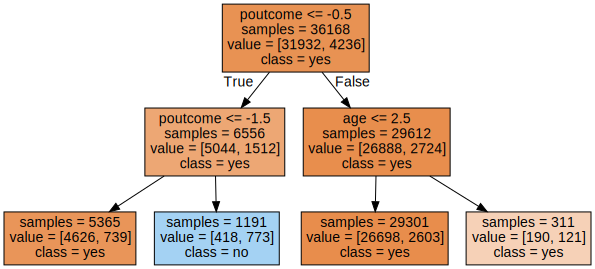

In [29]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Importancia de las caracteristicas

11


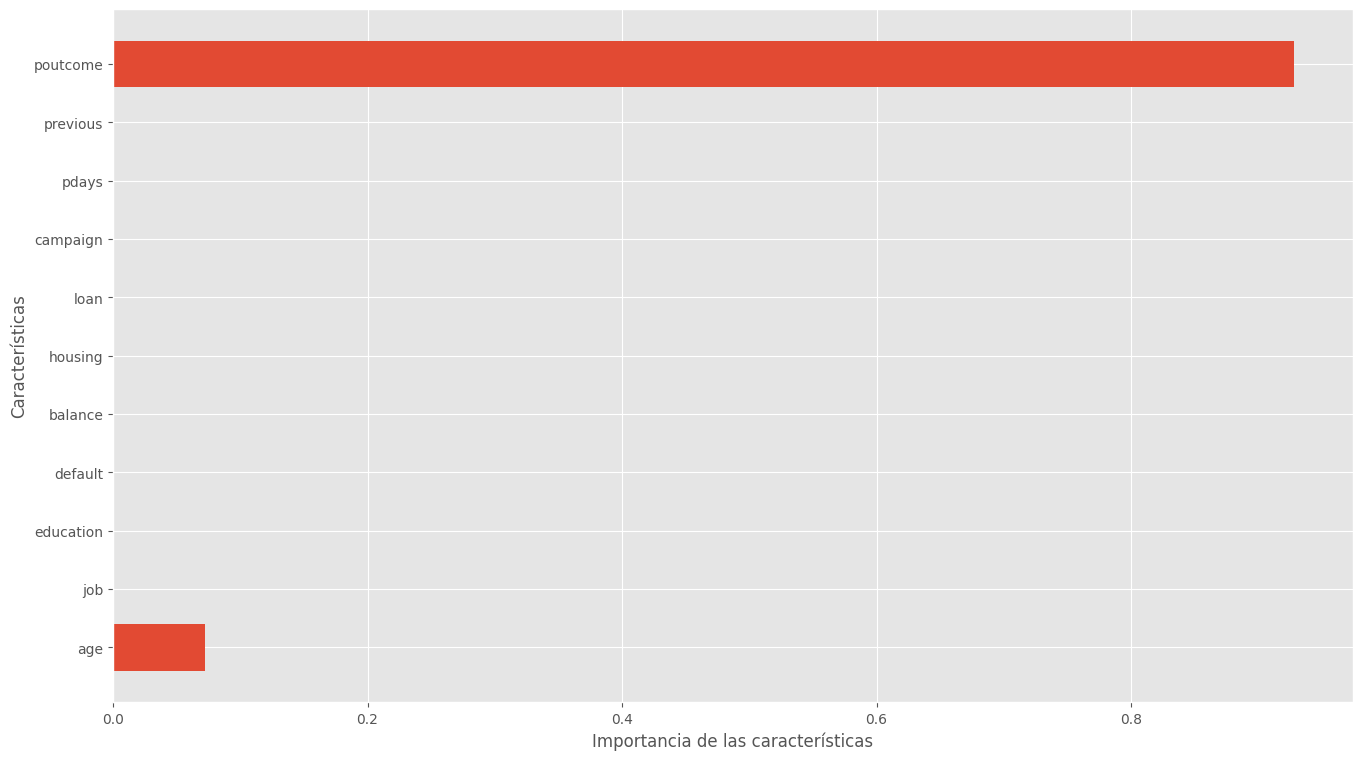

In [30]:
numeroCaracteristicas=XArbol.shape[1]
print(numeroCaracteristicas)
plt.barh(range(numeroCaracteristicas),modeloArbol.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()